# Study of CNN model

## Summary

In this notebook, I have made a simple CNN without any regularization model on MNIST dataset but noticed overfitting and then made a same model with dropout to resolve the problem of overfitting and get an accuracy of **99.24%** on MNIST Test Dataset. 

In [1]:
import keras

Using TensorFlow backend.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
np.random.seed(1671)

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


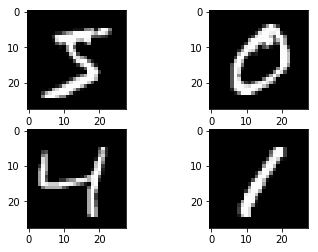

In [45]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [46]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [55]:
X_train[0].shape

(28, 28, 1)

In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [56]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### CNN model without using any reglarization

In [57]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (3,3), strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
__________

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [60]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 83s - loss: 0.2356 - acc: 0.9319 - val_loss: 0.0708 - val_acc: 0.9788
Epoch 2/10
48000/48000 [==============================] - 79s - loss: 0.0598 - acc: 0.9810 - val_loss: 0.0635 - val_acc: 0.9821
Epoch 3/10
48000/48000 [==============================] - 79s - loss: 0.0408 - acc: 0.9875 - val_loss: 0.0434 - val_acc: 0.9887
Epoch 4/10
48000/48000 [==============================] - 79s - loss: 0.0302 - acc: 0.9903 - val_loss: 0.0419 - val_acc: 0.9869
Epoch 5/10
48000/48000 [==============================] - 80s - loss: 0.0236 - acc: 0.9920 - val_loss: 0.0393 - val_acc: 0.9889
Epoch 6/10
48000/48000 [==============================] - 81s - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0400 - val_acc: 0.9882
Epoch 7/10
48000/48000 [==============================] - 79s - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0418 - val_acc: 0.9887
Epoch 8/10
48000/48000 [==============================

In [61]:
history.history.keys()

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])

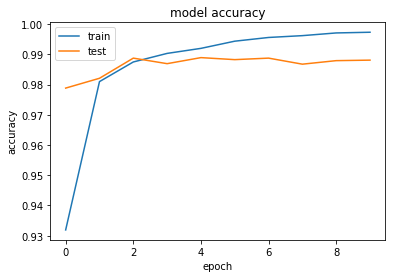

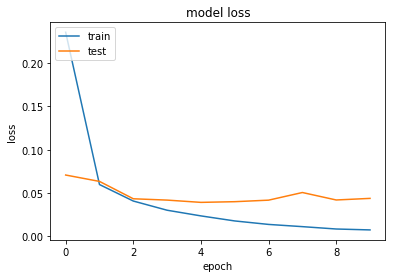

In [62]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
# evaluate the network
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9952/10000 [============================>.] - ETA: 0s
Loss: 0.03, Accuracy: 98.99%


#### CNN model with dropout as a regukarization technique

In [64]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(28,28,1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(64, (3,3), strides=(1,1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_22 (Activation)   (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
__________

In [65]:
model2.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 84s - loss: 0.2763 - acc: 0.9142 - val_loss: 0.0697 - val_acc: 0.9793
Epoch 2/10
48000/48000 [==============================] - 84s - loss: 0.0807 - acc: 0.9748 - val_loss: 0.0586 - val_acc: 0.9827
Epoch 3/10
48000/48000 [==============================] - 84s - loss: 0.0589 - acc: 0.9816 - val_loss: 0.0434 - val_acc: 0.9880
Epoch 4/10
48000/48000 [==============================] - 85s - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0453 - val_acc: 0.9870
Epoch 5/10
48000/48000 [==============================] - 84s - loss: 0.0383 - acc: 0.9883 - val_loss: 0.0354 - val_acc: 0.9896
Epoch 6/10
48000/48000 [==============================] - 83s - loss: 0.0322 - acc: 0.9894 - val_loss: 0.0348 - val_acc: 0.9892
Epoch 7/10
48000/48000 [==============================] - 84s - loss: 0.0304 - acc: 0.9900 - val_loss: 0.0362 - val_acc: 0.9905
Epoch 8/10
48000/48000 [==============================

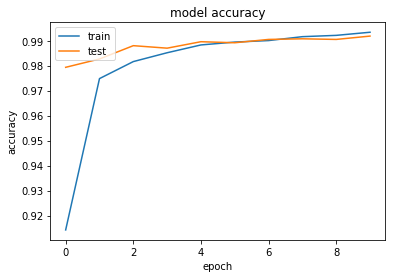

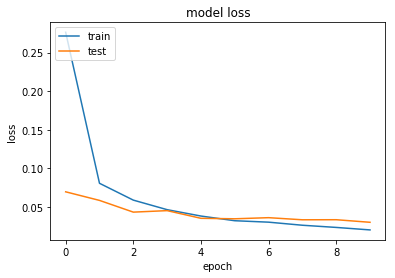

In [66]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
# evaluate the network
loss, accuracy = model2.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9920/10000 [============================>.] - ETA: 0s
Loss: 0.02, Accuracy: 99.24%
